In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
path = os.getcwd()+'/pd_speech_features.csv'
data = pd.read_csv(path)

In [5]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
total_num = data.gender.sum()
total_count = data.gender.count()
num_men = total_num
num_women = total_count - total_num

In [7]:
print("total number of men:{} women:{}".format(num_men, num_women))

total number of men:390 women:366


In [8]:
data[["numPulses", "numPeriodsPulses"]].corr()

,numPulses,numPeriodsPulses
numPulses,1.000000,0.999917
numPeriodsPulses,0.999917,1.000000


>since these two attributes are similar, one of them can be discarded.

In [9]:
del data['numPeriodsPulses']
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


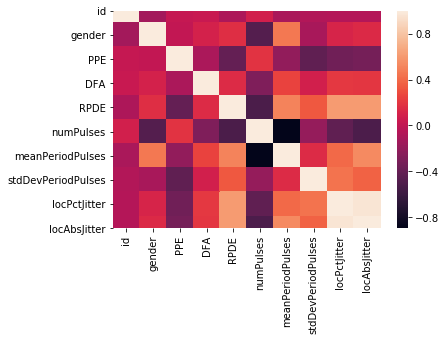

In [13]:
sns.heatmap(data[data.columns[0:10]].corr())

>IOC PCT Jitter and Ioc ABS Jitter have highly correlated, thus one of them can be eliminated

In [14]:
del data['locPctJitter']
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,0.008064,0.000087,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,0.008258,0.000073,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,0.008340,0.000060,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,0.010858,0.000183,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,0.008162,0.002669,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


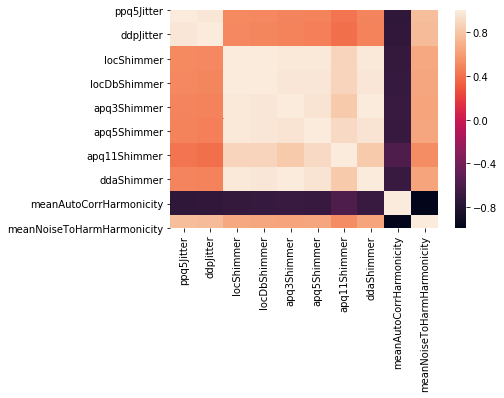

In [16]:
%matplotlib inline
sns.heatmap(data[data.columns[10:20]].corr())

>ppq5jitter and ddpjitter are highly correlated also IOCShimmer and IOCDBShimmer are also highly correlated

_features with similar name are highly correlated_

In [17]:
del data['ddpJitter']
del data['locShimmer']
del data['apq11Shimmer']
del data['meanNoiseToHarmHarmonicity']

data.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,0.008064,0.000087,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,0.008258,0.000073,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,0.008340,0.000060,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,0.010858,0.000183,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,0.008162,0.002669,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [18]:
data.shape

(756, 749)

In [19]:
y = data['class']
x = data.iloc[:,0:747]

In [41]:
y.sum()

564

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [31]:
#Decision tree
DT = DecisionTreeClassifier()
#K Nearest Neighbor
KNN = KNeighborsClassifier(n_neighbors = 5)
#Logistic regression
LR = LogisticRegression(solver = 'lbfgs', max_iter = 1000, tol = 0.001)

In [32]:
DT.fit(X_train, Y_train)
KNN.fit(X_train, Y_train)
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [33]:
y_DT = DT.predict(X_test)
y_KNN = KNN.predict(X_test)
y_LR = LR.predict(X_test)

### Decision tree score

In [38]:
print(confusion_matrix(Y_test, y_DT))
print('accuracy: {}'.format(accuracy_score(Y_test, y_DT)))

[[17  6]
 [ 4 49]]
accuracy: 0.868421052631579


### K Nearest Neighbor score

In [39]:
print(confusion_matrix(Y_test, y_KNN))
print('accuracy: {}'.format(accuracy_score(Y_test, y_KNN)))

[[ 6 17]
 [10 43]]
accuracy: 0.6447368421052632


### Logistic Regression score

In [40]:
print(confusion_matrix(Y_test, y_LR))
print('accuracy: {}'.format(accuracy_score(Y_test, y_LR)))

[[ 8 15]
 [ 3 50]]
accuracy: 0.7631578947368421
